# Box Muller

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, laplace, cauchy

In [5]:
def box_muller(s, t):
    return np.sqrt(-2*np.log(s)) * np.cos(2*np.pi*t)

In [6]:
n_samples = 10000
x = []
for _ in range(n_samples):
    s = np.random.uniform(0, 1)
    t = np.random.uniform(0, 1)
    x.append(box_muller(s, t))

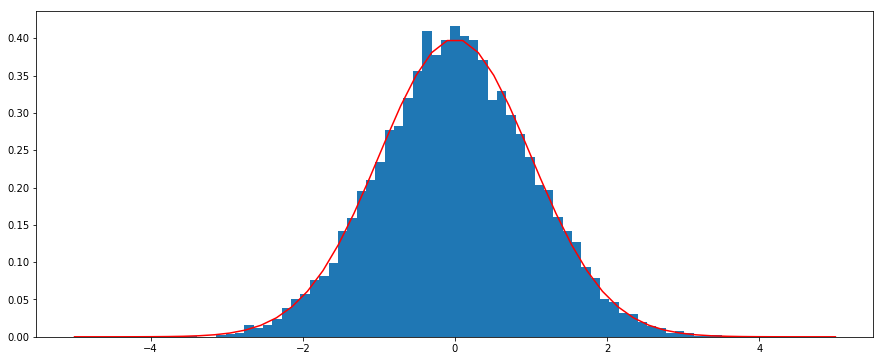

In [7]:
plt.figure(figsize=(15,6))
plt.hist(x, bins='auto', density=1)

x2 = np.linspace(-5, 5)
x2 = plt.plot(x2, norm.pdf(x2), color='red')

plt.show()

# Importance Sampling

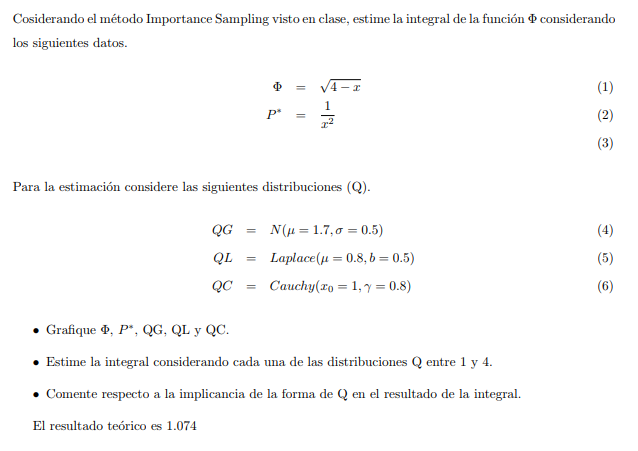

In [8]:
def phi(x):
    return np.sqrt(4 - x)

def p_star(x):
    return 1 / (x**2)

def QG_pdf(x):
    return norm.pdf(x, loc=1.7, scale=0.5)
    
def QL_pdf(x):
    return laplace.pdf(x, loc=0.8, scale=0.5)

def QC_pdf(x):
    return cauchy.pdf(x, loc=1, scale=0.8)

C:\Users\Greg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


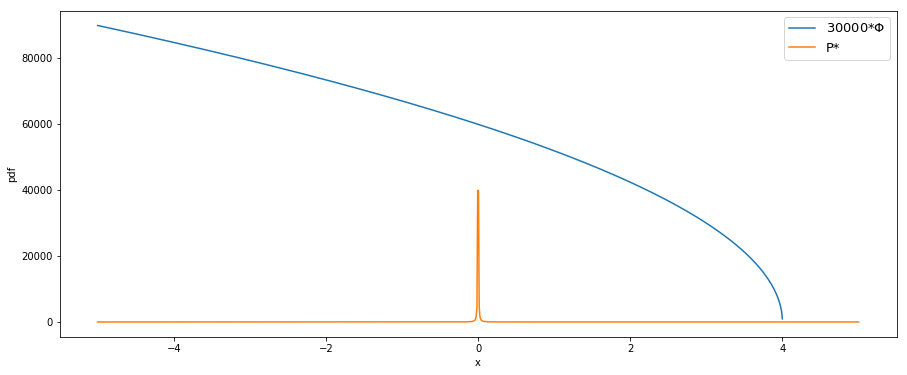

In [9]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15, 6))

C = 30000
plt.plot(x, [C*phi(x_i) for x_i in x], label=f'{C}*$\Phi$')
plt.plot(x, [p_star(x_i) for x_i in x], label='P*')

plt.xlabel('x')
plt.ylabel('pdf')

plt.legend(prop={'size': 13})
plt.show()

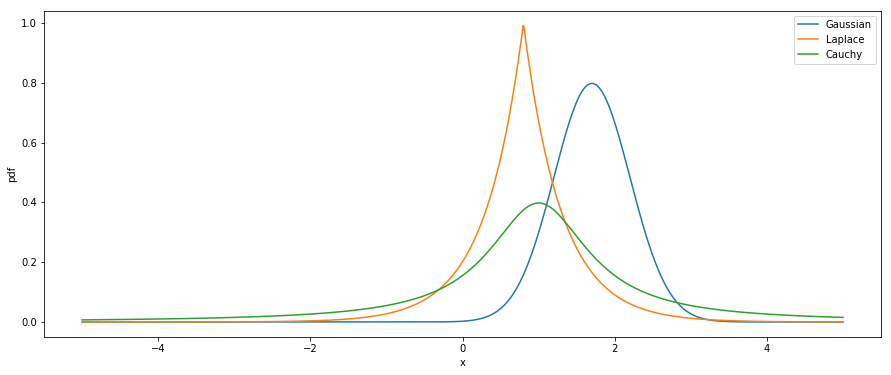

In [10]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15, 6))

plt.plot(x, [QG_pdf(x_i) for x_i in x], label='Gaussian')
plt.plot(x, [QL_pdf(x_i) for x_i in x], label='Laplace')
plt.plot(x, [QC_pdf(x_i) for x_i in x], label='Cauchy')

plt.xlabel('x')
plt.ylabel('pdf')

plt.legend()
plt.show()

Según lo visto en clases:
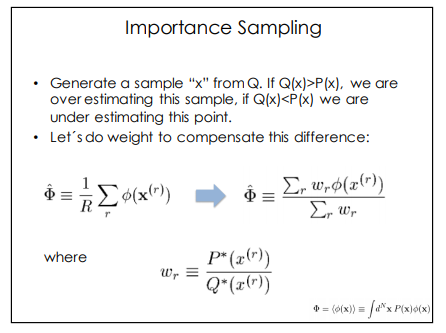

Con ayuda de estas distribuciones calcularemos la integral desde 1 a 4 de la función $\Phi$

In [11]:
R = 10000
x = np.random.uniform(1, 4, R)

phi_estimation = 0
total_w = 0
for r in range(R):
    x_r = x[r]
    w_r = p_star(x_r) / QL_pdf(x_r)
    phi_estimation += phi(x_r)*w_r
    
    total_w += w_r

phi_estimation /= total_w
phi_estimation

0.76380475090139299